In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load drift reports JSON
with open("drift_reports.json") as f:
    drift_reports = json.load(f)

# Convert JSON to a DataFrame for easier plotting
drift_data = []

# Set a drift score threshold for high drift
drift_threshold = 0.05

for station, report in drift_reports.items():
    # Extracting the relevant metrics
    column_drift_metric = report["metrics"][0]["result"]
    dataset_drift_metric = report["metrics"][1]["result"]
    missing_values_metric = report["metrics"][2]["result"]
    
    drift_data.append({
        "StationName": station,
        "DriftDetected": column_drift_metric["drift_detected"],
        "DriftScore": column_drift_metric["drift_score"],
        "StatTestThreshold": column_drift_metric["stattest_threshold"],
        "DriftShare": dataset_drift_metric["share_of_drifted_columns"],
        "CurrentMissingValues": missing_values_metric["current"]["number_of_missing_values"],
        "ReferenceMissingValues": missing_values_metric["reference"]["number_of_missing_values"]
    })

# Create a DataFrame from the extracted data
df = pd.DataFrame(drift_data)

# Display the first rows to verify data
print(df.head())



    StationName  DriftDetected  DriftScore  StatTestThreshold  DriftShare  \
0  StationName1          False    0.554818               0.05         0.0   

   CurrentMissingValues  ReferenceMissingValues  
0                     0                       0  


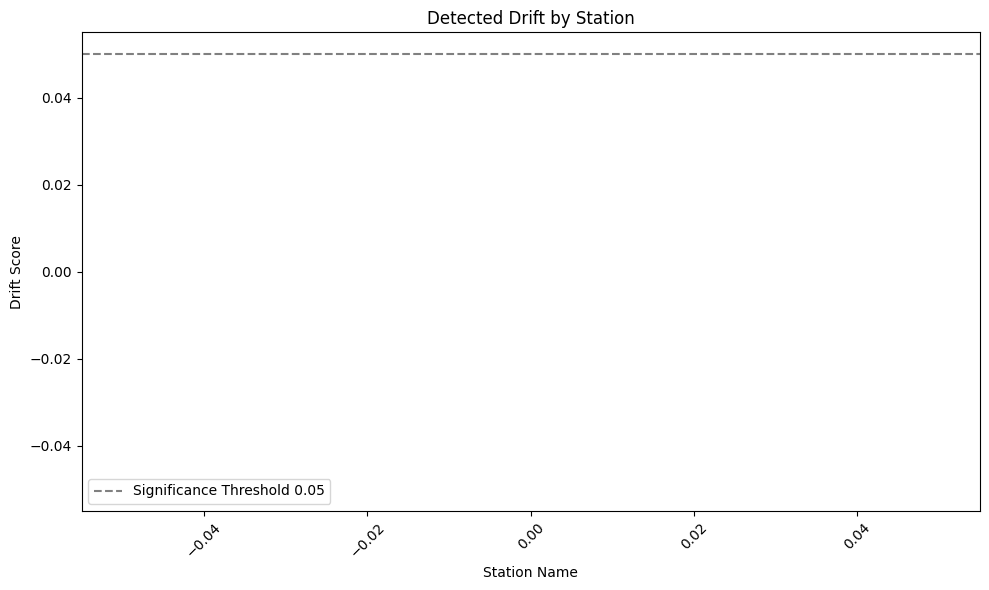

In [43]:
# Plot detected drift for each station
detected_drift = df[df["DriftDetected"] == True]

plt.figure(figsize=(10, 6))
plt.bar(detected_drift["StationName"], detected_drift["DriftScore"], color="salmon")
plt.xlabel("Station Name")
plt.ylabel("Drift Score")
plt.title("Detected Drift by Station")
plt.axhline(y=drift_threshold, color="gray", linestyle="--", label=f"Significance Threshold {drift_threshold}")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



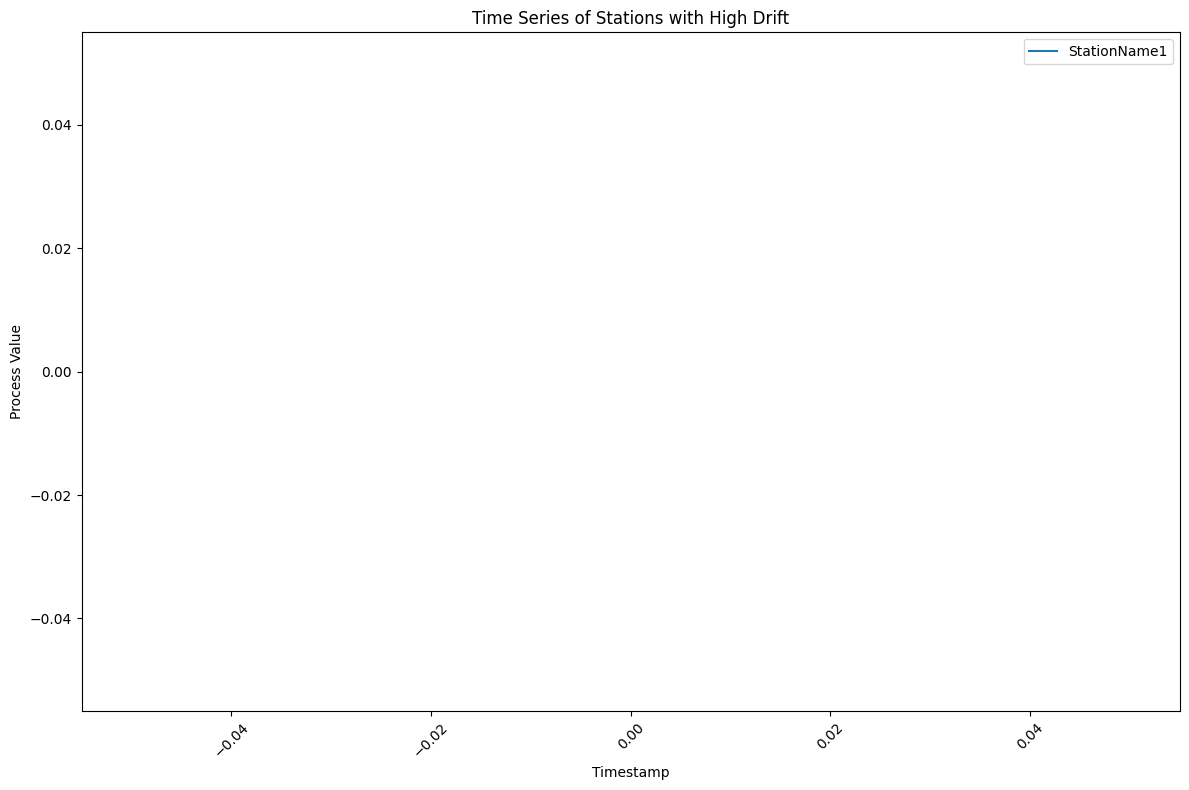

In [44]:
# Filter for high drift stations
high_drift_stations = df[df["DriftScore"] > drift_threshold]["StationName"]


processtimes_data = pd.read_json("mock_station_data.json")


high_drift_stations_data = pd.merge(high_drift_stations, processtimes_data, how="inner")

# Step 4: Plot time series for high drift stations
plt.figure(figsize=(12, 8))

for station in high_drift_stations:
    station_data = high_drift_stations_data[high_drift_stations_data["StationName"] == station]
    plt.plot(station_data["TimeStamp"], station_data["Value"], label=station)

plt.xlabel("Timestamp")
plt.ylabel("Process Value")
plt.title("Time Series of Stations with High Drift")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='TimeStamp', ylabel='Value'>

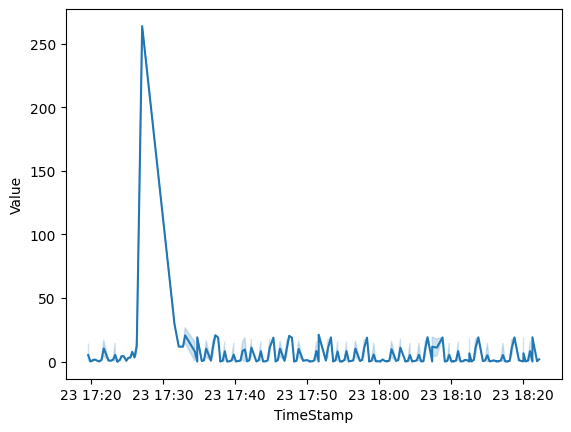

In [52]:
import seaborn as sns

df = pd.read_json("processtimes.json")

df = df[df['StationName'] == 'StationName6']

sns.lineplot(data=df, x="TimeStamp", y="Value")